# 明确目标

In [2]:
# 导入pyplot模块
from matplotlib import pyplot as plt

# 设置显示中文字体
plt.rcParams['font.family'] = ['Source Han Sans CN']

# 导入pandas模块并将其简化为pd
import pandas as pd

In [3]:
mask_data = pd.read_csv('./工作/mask_data.csv', encoding = 'utf-8')
mask_data

,订单编号,日期,省,订单量,单价,销售额
0,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,广东,0.0,30.0,0.0
1,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
2,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0
3,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
4,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
...,...,...,...,...,...,...
101937,6339-43f4-a12b-7b57d1ce3a48,NaN,NaN,NaN,NaN,NaN
101938,5e43-41c2-8696-fd5909cc98a4,NaN,NaN,999999999.0,999999999.0,999999999.0
101939,824c-4f2b-af43-038938d2db46,NaN,NaN,999999999.0,999999999.0,999999999.0
101940,1cf0-483a-ab11-0cebc6406c78,NaN,NaN,0.0,NaN,0.0


# 数据处理

## 数据清洗

### 处理缺失值

#### 查找缺失值

In [4]:
# 查看mask_data的缺失值
mask_data.isna()

,订单编号,日期,省,订单量,单价,销售额
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
101937,False,True,True,True,True,True
101938,False,True,True,False,False,False
101939,False,True,True,False,False,False
101940,False,True,True,False,True,False


In [5]:
# 查看数据后5行
mask_data.tail()

,订单编号,日期,省,订单量,单价,销售额
101937,6339-43f4-a12b-7b57d1ce3a48,NaN,NaN,NaN,NaN,NaN
101938,5e43-41c2-8696-fd5909cc98a4,NaN,NaN,999999999.0,999999999.0,999999999.0
101939,824c-4f2b-af43-038938d2db46,NaN,NaN,999999999.0,999999999.0,999999999.0
101940,1cf0-483a-ab11-0cebc6406c78,NaN,NaN,0.0,NaN,0.0
101941,8318-43df-9d34-0656d9eb759a,NaN,NaN,0.0,NaN,0.0


#### 删除缺失值

In [6]:
# 删除所有缺失值
mask_data = mask_data.dropna()
# 查看数据基本信息总结
mask_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100956 entries, 0 to 100955
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单编号    100956 non-null  object 
 1   日期      100956 non-null  object 
 2   省       100956 non-null  object 
 3   订单量     100956 non-null  float64
 4   单价      100956 non-null  float64
 5   销售额     100956 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


### 处理重复值

#### 查找重复值

In [7]:
# 查找mask_data中的重复行
mask_data.duplicated()

0         False
1         False
2         False
3          True
4          True
          ...  
100951    False
100952    False
100953    False
100954    False
100955    False
Length: 100956, dtype: bool

In [8]:
# 查看mask_data中的重复数据
mask_data[mask_data.duplicated()]

,订单编号,日期,省,订单量,单价,销售额
3,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
4,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
412,2b31-4392-be6e-19af71e40261,2020-01-09,河南,1.0,30.0,30.0
441,d707-4d5c-ac10-59d3fd3dc0bb,2020-01-10,广东,1.0,30.0,30.0
845,49f6-4bd5-97a5-aeb075a1c8c3,2020-01-16,湖北,8.0,40.0,320.0
...,...,...,...,...,...,...
100157,1ee1-41a6-8c0a-7c24f988689f,2020-06-25,湖北,8.0,30.0,240.0
100312,c72a-401d-8f11-39becb49d442,2020-06-26,湖北,9.0,30.0,270.0
100321,73f3-4d40-af4e-426548a7c539,2020-06-26,广东,3.0,30.0,90.0
100330,1265-4d27-a5c6-d3d6f44cd594,2020-06-26,广东,3.0,30.0,90.0


#### 删除重复值

In [9]:
# 直接删除所有重复值
mask_data = mask_data.drop_duplicates()
# 查看mask_data中的重复数据
mask_data[mask_data.duplicated()]

,订单编号,日期,省,订单量,单价,销售额


In [10]:
# 查看清洗后的基本信息总结
mask_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100508 entries, 0 to 100955
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   订单编号    100508 non-null  object 
 1   日期      100508 non-null  object 
 2   省       100508 non-null  object 
 3   订单量     100508 non-null  float64
 4   单价      100508 non-null  float64
 5   销售额     100508 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


### 处理异常值

#### 检查异常值

In [11]:
# 查看数据描述性统计信息
mask_data.describe()

,订单量,单价,销售额
count,1.005080e+05,1.005080e+05,1.005080e+05
mean,9.551786e+05,9.552499e+05,9.592048e+05
std,3.089086e+07,3.089085e+07,3.089073e+07
min,0.000000e+00,3.000000e+01,0.000000e+00
25%,9.000000e+00,5.000000e+01,5.500000e+02
50%,2.000000e+01,5.000000e+01,1.700000e+03
75%,4.700000e+01,1.500000e+02,4.000000e+03
max,1.000000e+09,1.000000e+09,1.000000e+09


In [12]:
# 查看单价小于等于200的数据
mask_data[mask_data['单价'] <= 200]

,订单编号,日期,省,订单量,单价,销售额
0,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,广东,0.0,30.0,0.0
1,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,河南,0.0,30.0,0.0
2,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0
5,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,其他,0.0,30.0,0.0
6,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,湖北,1.0,30.0,30.0
...,...,...,...,...,...,...
100951,8cad-41ee-85b7-c59b85f0ebe6,2020-06-30,湖北,10.0,30.0,300.0
100952,4ea4-480a-a070-295408955363,2020-06-30,湖北,6.0,30.0,180.0
100953,70f3-4461-9b5f-7f53a55c51b6,2020-06-30,湖北,10.0,30.0,300.0
100954,9cc8-4542-8fed-3145e1942504,2020-06-30,湖北,10.0,30.0,300.0


In [13]:
# 查看单价小于等于200的数据
mask_data['单价'] <= 200

0         True
1         True
2         True
5         True
6         True
          ... 
100951    True
100952    True
100953    True
100954    True
100955    True
Name: 单价, Length: 100508, dtype: bool

In [14]:
# 筛选单价小于等于200的数据
mask_data = mask_data[mask_data['单价'] <= 200]
# 查看mask_data的描述性统计信息
mask_data.describe()

,订单量,单价,销售额
count,100412.000000,100412.000000,100412.000000
mean,30.786529,102.161793,4060.837350
std,27.639737,63.533396,5278.401132
min,0.000000,30.000000,0.000000
25%,9.000000,50.000000,550.000000
50%,20.000000,50.000000,1700.000000
75%,47.000000,150.000000,4000.000000
max,100.000000,200.000000,20000.000000


In [15]:
# 筛选订单量大于0的数据
mask_data = mask_data[mask_data['订单量'] > 0]
# 查看mask_data的描述性统计信息
mask_data.describe()

,订单量,单价,销售额
count,99485.000000,99485.000000,99485.000000
mean,31.073398,102.763130,4098.676182
std,27.607238,63.486035,5288.293082
min,1.000000,30.000000,30.000000
25%,9.000000,50.000000,560.000000
50%,20.000000,100.000000,1750.000000
75%,47.000000,150.000000,4000.000000
max,100.000000,200.000000,20000.000000


In [16]:
mask_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99485 entries, 2 to 100955
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单编号    99485 non-null  object 
 1   日期      99485 non-null  object 
 2   省       99485 non-null  object 
 3   订单量     99485 non-null  float64
 4   单价      99485 non-null  float64
 5   销售额     99485 non-null  float64
dtypes: float64(3), object(3)
memory usage: 5.3+ MB


## 数据整理

In [17]:
# 查看清洗好的数据
mask_data

,订单编号,日期,省,订单量,单价,销售额
2,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0
6,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,湖北,1.0,30.0,30.0
11,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,湖北,1.0,30.0,30.0
12,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,湖南,1.0,30.0,30.0
13,d707-4d5c-ac10-59d3fd3dc0bb,2020-01-01,广东,1.0,30.0,30.0
...,...,...,...,...,...,...
100951,8cad-41ee-85b7-c59b85f0ebe6,2020-06-30,湖北,10.0,30.0,300.0
100952,4ea4-480a-a070-295408955363,2020-06-30,湖北,6.0,30.0,180.0
100953,70f3-4461-9b5f-7f53a55c51b6,2020-06-30,湖北,10.0,30.0,300.0
100954,9cc8-4542-8fed-3145e1942504,2020-06-30,湖北,10.0,30.0,300.0


### 转换日期数据

In [18]:
# 转换日期数据，并设置对应的日期格式
date_data = pd.to_datetime(mask_data['日期'], format = '%Y-%m-%d')
# 查看date_data
date_data

2        2020-01-01
6        2020-01-01
11       2020-01-01
12       2020-01-01
13       2020-01-01
            ...    
100951   2020-06-30
100952   2020-06-30
100953   2020-06-30
100954   2020-06-30
100955   2020-06-30
Name: 日期, Length: 99485, dtype: datetime64[ns]

#### 提取月份信息

In [19]:
# 转换日期数据，并设置对应的日期格式
date_data = pd.to_datetime(mask_data['日期'], format = '%Y-%m-%d')
# 提取日期数据中的月份信息
month_data = date_data.dt.month
# 查看month_data
month_data

2         1
6         1
11        1
12        1
13        1
         ..
100951    6
100952    6
100953    6
100954    6
100955    6
Name: 日期, Length: 99485, dtype: int64

#### 添加新列

In [20]:
# 将月份数据添加到原数据中
mask_data['月份'] = month_data
# 查看原数据
mask_data

,订单编号,日期,省,订单量,单价,销售额,月份
2,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0,1
6,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,湖北,1.0,30.0,30.0,1
11,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,湖北,1.0,30.0,30.0,1
12,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,湖南,1.0,30.0,30.0,1
13,d707-4d5c-ac10-59d3fd3dc0bb,2020-01-01,广东,1.0,30.0,30.0,1
...,...,...,...,...,...,...,...
100951,8cad-41ee-85b7-c59b85f0ebe6,2020-06-30,湖北,10.0,30.0,300.0,6
100952,4ea4-480a-a070-295408955363,2020-06-30,湖北,6.0,30.0,180.0,6
100953,70f3-4461-9b5f-7f53a55c51b6,2020-06-30,湖北,10.0,30.0,300.0,6
100954,9cc8-4542-8fed-3145e1942504,2020-06-30,湖北,10.0,30.0,300.0,6


In [21]:
# 保存清洗干净的数据，并取消写入行索引
mask_data.to_csv('./工作/mask_data_clean.csv', index = False)

# 数据分析

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# 图像文本中文化
plt.rcParams['font.family'] = ['Source Han Sans CN']

In [23]:
# 读取清洗好的数据
mask_data_clean = pd.read_csv('./工作/mask_data_clean.csv', encoding = 'utf-8')
# 查看清洗好的数据
mask_data_clean

,订单编号,日期,省,订单量,单价,销售额,月份
0,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0,1
1,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,湖北,1.0,30.0,30.0,1
2,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,湖北,1.0,30.0,30.0,1
3,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,湖南,1.0,30.0,30.0,1
4,d707-4d5c-ac10-59d3fd3dc0bb,2020-01-01,广东,1.0,30.0,30.0,1
...,...,...,...,...,...,...,...
99480,8cad-41ee-85b7-c59b85f0ebe6,2020-06-30,湖北,10.0,30.0,300.0,6
99481,4ea4-480a-a070-295408955363,2020-06-30,湖北,6.0,30.0,180.0,6
99482,70f3-4461-9b5f-7f53a55c51b6,2020-06-30,湖北,10.0,30.0,300.0,6
99483,9cc8-4542-8fed-3145e1942504,2020-06-30,湖北,10.0,30.0,300.0,6


## 分析各月总订单量趋势

In [24]:
# 获取各月总订单量的数据
order_number = mask_data_clean.groupby('月份')['订单量'].sum()
order_number

月份
1      13852.0
2     389319.0
3    1961480.0
4     546276.0
5     158188.0
6      22222.0
Name: 订单量, dtype: float64

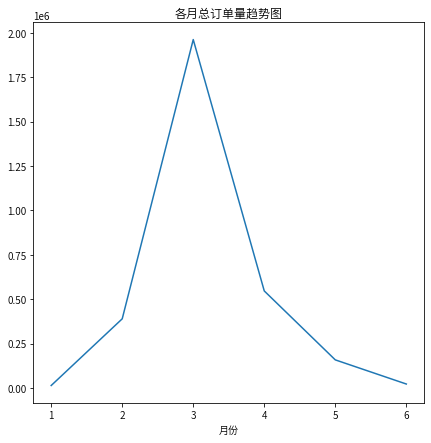

In [25]:
# 画出各月订单总量的折线图
order_number.plot(kind = 'line', figsize = (7, 7), title = '各月总订单量趋势图')

## 分析各月平均单价趋势

In [26]:
# 将各月的口罩价格均值保存在mask_price中
mask_price = mask_data_clean.groupby('月份')['单价'].mean()
mask_price

月份
1     38.878137
2     74.848017
3    175.518112
4     50.000000
5     40.000000
6     30.000000
Name: 单价, dtype: float64

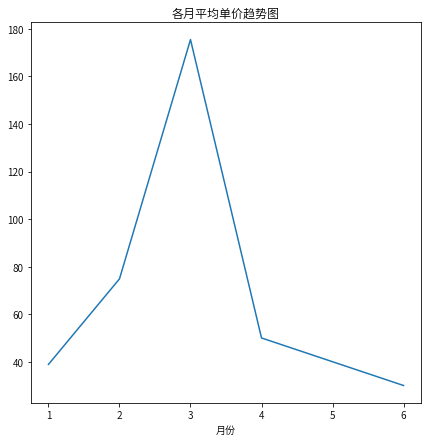

In [27]:
# 画出各月份平均单价折线图
mask_price.plot(kind='line', figsize = (7, 7), title = '各月平均单价趋势图')

## 分析各省各月订单量趋势

In [28]:
# 提取各省各月订单量数据
month_order = mask_data_clean.groupby(['月份', '省'])['订单量'].sum()
# 将多级索引的的Series对象转换成DataFrame对象
month_order_df = month_order.unstack()
# 查看各省各月订单量数据
month_order_df

省,其他,广东,江苏,河南,湖北,湖南
月份,,,,,,
1,452.0,2628.0,263.0,434.0,9055.0,1020.0
2,10668.0,77427.0,2530.0,10058.0,259511.0,29125.0
3,16871.0,125618.0,4004.0,18293.0,1731060.0,65634.0
4,2713.0,46708.0,106.0,2917.0,476558.0,17274.0
5,1250.0,22364.0,118.0,1239.0,126342.0,6875.0
6,113.0,4038.0,116.0,107.0,17182.0,666.0


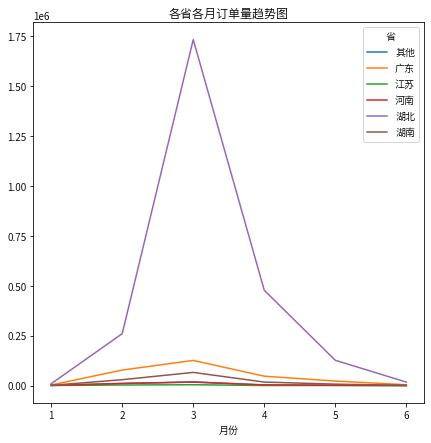

In [29]:
# 画出各月份平均单价折线图
month_order_df.plot(kind='line', figsize = (7, 7), title = '各省各月订单量趋势图')

# 数据展现

In [30]:
# 导入pandas模块并将其简化为pd
import pandas as pd
# 导入pyplot模块
from matplotlib import pyplot as plt
# 设置显示中文字体
plt.rcParams['font.family'] = ['Source Han Sans CN']

In [31]:
# 读取清洗好的数据'mask_data_clean.csv'并赋值给mask_data_clean变量
mask_data_clean = pd.read_csv('./工作/mask_data_clean.csv', encoding = 'utf-8')
# 查看mask_data_clean
mask_data_clean

,订单编号,日期,省,订单量,单价,销售额,月份
0,a56d-4415-ad6e-020cdb154c35,2020-01-01,湖北,1.0,30.0,30.0,1
1,953f-4b46-a8a2-0eb0e39818a8,2020-01-01,湖北,1.0,30.0,30.0,1
2,87af-48e5-8bed-c5dcf9ecc172,2020-01-01,湖北,1.0,30.0,30.0,1
3,535a-4eca-8fa0-9cc54c66e11d,2020-01-01,湖南,1.0,30.0,30.0,1
4,d707-4d5c-ac10-59d3fd3dc0bb,2020-01-01,广东,1.0,30.0,30.0,1
...,...,...,...,...,...,...,...
99480,8cad-41ee-85b7-c59b85f0ebe6,2020-06-30,湖北,10.0,30.0,300.0,6
99481,4ea4-480a-a070-295408955363,2020-06-30,湖北,6.0,30.0,180.0,6
99482,70f3-4461-9b5f-7f53a55c51b6,2020-06-30,湖北,10.0,30.0,300.0,6
99483,9cc8-4542-8fed-3145e1942504,2020-06-30,湖北,10.0,30.0,300.0,6


## 绘制各月总销售额趋势图

In [32]:
# 求得各月总销售额的数据，并将其赋值给变量order_number
sales_income = mask_data_clean.groupby('月份')['销售额'].sum()
# 查看order_number
sales_income

月份
1       550370.0
2     29256800.0
3    343641650.0
4     27313800.0
5      6327520.0
6       666660.0
Name: 销售额, dtype: float64

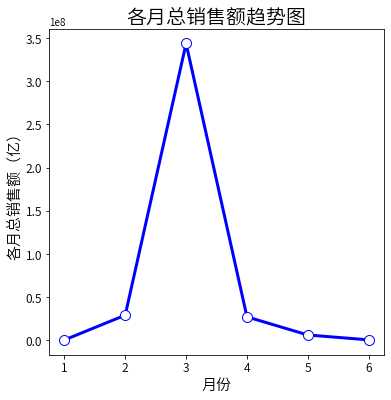

In [47]:
# 生成画布，并设置画布的大小
plt.figure(figsize=(6, 6))
# 设置 x/y 的坐标值
x = sales_income.index
y = sales_income.values
# 绘制折线图，并调整线条、标记点的样式
plt.plot(x, y, linewidth=3, color='b', marker='o',
         markerfacecolor='w', markersize=10)
# 设置图表标题名及字体大小
plt.title('各月总销售额趋势图', fontsize=20)
# 设置坐标轴的刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置坐标轴的标题名及字体大小
plt.xlabel('月份', fontsize=15)
plt.ylabel('各月总销售额（亿）', fontsize=15)
# 保存画布
plt.savefig('./工作/各月总销售额趋势图.png')

## 绘制各月平均单价趋势图和分布图

In [34]:
# 求得各月平均单价数据，并将其赋值给变量average_price
mask_price = mask_data_clean.groupby('月份')['单价'].mean()
# 查看average_price
mask_price

月份
1     38.878137
2     74.848017
3    175.518112
4     50.000000
5     40.000000
6     30.000000
Name: 单价, dtype: float64

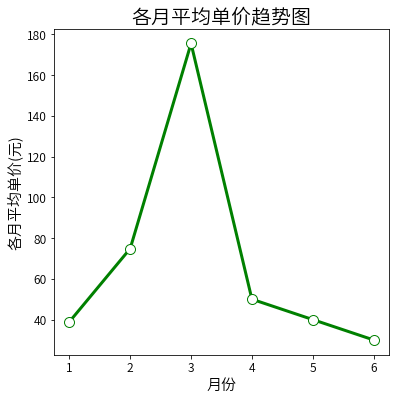

In [36]:
# 调整画布大小
plt.figure(figsize=(6, 6))
# 设置x轴和y轴的值
x = mask_price.index
y = mask_price.values
plt.plot(x, y, linewidth=3, color='g', marker='o',
         markerfacecolor='w', markersize=10)
# 设置坐标轴标签名及其字体大小
plt.xlabel('月份', fontsize=15)
plt.ylabel('各月平均单价(元)', fontsize=15)
# 设置x,y轴坐标轴上字体的大小
plt.xticks(size=12)
plt.yticks(size=12)
# 设置标题及其字体大小
plt.title('各月平均单价趋势图', fontsize=20)
# 保存画布
plt.savefig('./工作/各月平均单价趋势图.png')

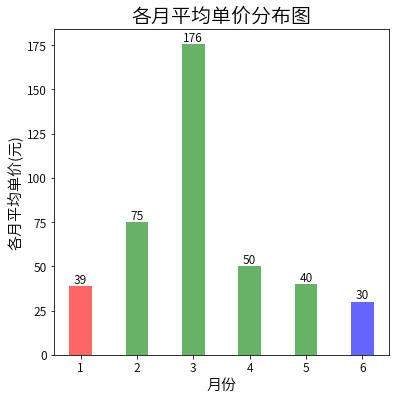

In [48]:
# 调整画布大小
plt.figure(figsize=(6, 6))
# 设置x轴和y轴的值
x = mask_price.index
y = mask_price.values
# 绘制柱状图，调整柱子的样式，并区分 1 月份和 6 月份颜色
plt.bar(x, height=y, label='各月总订单量分布', color=[
        'r', 'g', 'g', 'g', 'g', 'b'], width=0.4, alpha=0.6)
# 设置坐标轴标签名及其字体大小
plt.xlabel('月份', fontsize=15)
plt.ylabel('各月平均单价(元)', fontsize=15)
# 设置x,y轴坐标轴上字体的大小
plt.xticks(size=12)
plt.yticks(size=12)
# 设置标题及其字体大小
plt.title('各月平均单价分布图', fontsize=20)
# 设置数据标签
for a, b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=12)
# 保存画布
plt.savefig('./工作/各月平均单价分布图.png')

## 绘制各月总订单量趋势图和分布图

In [63]:
# 求得各月总订单量的数据，并将其赋值给变量order_number
order_number = mask_data_clean.groupby('月份')['订单量'].sum()
# 查看order_number
order_number

月份
1      13852.0
2     389319.0
3    1961480.0
4     546276.0
5     158188.0
6      22222.0
Name: 订单量, dtype: float64

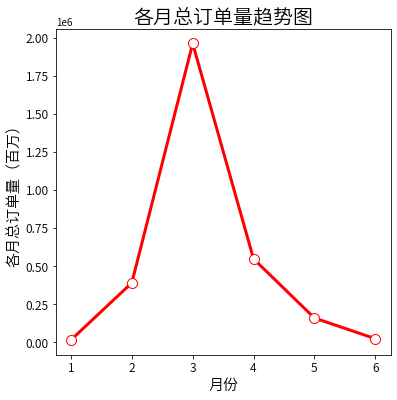

In [64]:
# 生成画布，并设置画布的大小
plt.figure(figsize=(6, 6))
# 设置 x/y 坐标值
x = order_number.index
y = order_number.values
# 绘制折线图，并调整线条、标记点的样式
plt.plot(x, y, linewidth=3, color=('r'), marker='o',
         markerfacecolor='w', markersize=10)
# 设置图表标题名及字体大小
plt.title('各月总订单量趋势图', fontsize=20)
# 设置坐标轴的刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置坐标轴的标题名及字体大小
plt.xlabel('月份', fontsize=15)
plt.ylabel('各月总订单量（百万）', fontsize=15)
# 保存画布
plt.savefig('./工作/各月总订单量趋势图.png')

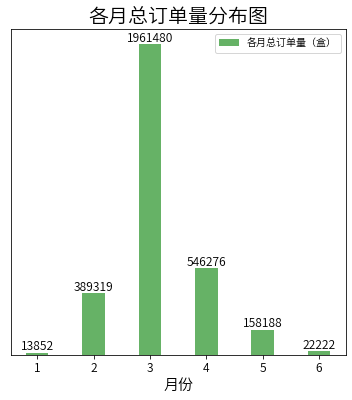

In [84]:
# 生成画布，并设置画布的大小
plt.figure(figsize=(6, 6))
# 设置 x/y 坐标值
x = order_number.index
y = order_number.values
# 绘制柱状图，调整柱子的样式，并区分 1 月份和 6 月份颜色
plt.bar(x, height=y, label='各月总订单量分布', color='g', width=0.4, alpha=0.6)
# 设置图表标题名及字体大小
plt.title('各月总订单量分布图', fontsize=20)
# 设置坐标轴的刻度字体大小
plt.xticks(fontsize=12)
plt.yticks([])
# 设置坐标轴的标题名及字体大小
plt.xlabel('月份', fontsize=15)
# 设置数据标签
for a, b in zip(x, y):
    plt.text(a, b, '%.0f' % b, ha='center', va='bottom', fontsize=12)
# 添加图例
plt.legend(['各月总订单量（盒）'])
# 保存画布
plt.savefig('./工作/各月总订单量分布图.png')

## 绘制各省各月订单量趋势图

In [85]:
# 提取各省各月订单量数据
month_order = mask_data_clean.groupby(['月份', '省'])['订单量'].sum()
# 将多级索引的的Series对象转换成DataFrame对象
month_order_df = month_order.unstack()
# 查看各省各月订单量数据
month_order_df

省,其他,广东,江苏,河南,湖北,湖南
月份,,,,,,
1,452.0,2628.0,263.0,434.0,9055.0,1020.0
2,10668.0,77427.0,2530.0,10058.0,259511.0,29125.0
3,16871.0,125618.0,4004.0,18293.0,1731060.0,65634.0
4,2713.0,46708.0,106.0,2917.0,476558.0,17274.0
5,1250.0,22364.0,118.0,1239.0,126342.0,6875.0
6,113.0,4038.0,116.0,107.0,17182.0,666.0


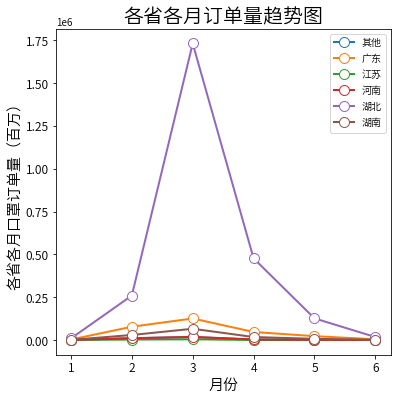

In [86]:
# 调整画布大小
plt.figure(figsize=(6, 6))
# 设置 x/y 坐标值
x = month_order_df.index
y = month_order_df.values
# 绘制折线图，并调整线条、标记点的样式
plt.plot(x, y, linewidth=2, marker='o', markerfacecolor='w', markersize=10)
# 设置图表标题名及字体大小
plt.title('各省各月订单量趋势图', fontsize=20)
# 设置坐标轴的刻度字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# 设置坐标轴的标题名及字体大小
plt.xlabel('月份', fontsize=15)
plt.ylabel('各省各月口罩订单量（百万）', fontsize=15)
# 添加图例
plt.legend(['其他', '广东', '江苏', '河南', '湖北', '湖南'])
# 保存画布
plt.savefig('./工作/各省各月订单量趋势图.png')